In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
MAX_X = 100.0
MAX_Y = 100.0

In [3]:
def gen_x():
    curX = 0.0
    while curX < MAX_X:
        yield curX
        curX += random.uniform(5.0, 10.0)
xs = list(gen_x())
ys= list([random.uniform(0.0, MAX_Y) for x in xs])

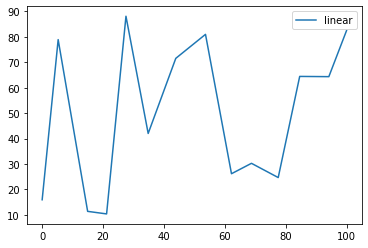

In [4]:
plt.plot(xs, ys, '-')
plt.legend(['linear'], loc='best')
plt.show()

In [5]:
def build_points(xs, ys, minV, maxV, dV, func):
    lxs = []
    lys = []
    val = minV
    while val < maxV:
        val += dV
        lxs.append(val)
        lys.append(func(xs, ys, val))
    return lxs, lys

def plot_func(func):
    axs, ays = build_points(xs, ys, 0.0, MAX_X, 0.1, linear)
    lxs, lys = build_points(xs, ys, 0.0, MAX_X, 0.1, func)
    plt.plot(lxs, lys, '-', xs, ys, 'o', axs, ays, "--")
    plt.legend([func.__name__, "data", "linear"], loc='best')
    plt.show()

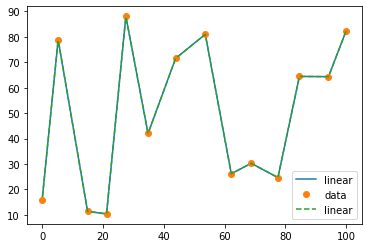

In [6]:
def findNearest(xs, ys, val):
    i = 0
    try:
        while xs[i+1] <= val:
            i+=1
    except IndexError:
        pass
    return i

def linear(xs, ys, val):
    i = findNearest(xs, ys, val)
    if i == len(xs)-1:
        return ys[-1]
    lerpCoeff = (val - xs[i]) / (xs[i+1] - xs[i])
    yVal = ys[i] + lerpCoeff * (ys[i+1] - ys[i])
    return yVal
plot_func(linear)

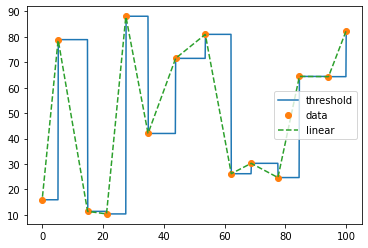

In [7]:
def threshold(xs, ys, val):
    i = 0
    try:
        while xs[i+1] < val:
            i+=1
    except IndexError:
        pass
    return ys[i]

plot_func(threshold)

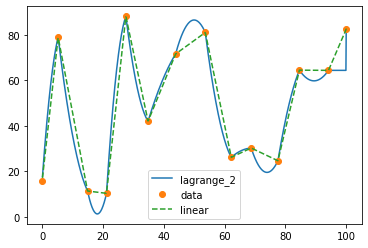

In [8]:
def lagrange_2(xs, ys, val):
    i = findNearest(xs, ys, val)
    if i >= len(xs)-2:
        return ys[i]
    
    ci0 = (val - xs[i+1]) * (val - xs[i+2]) / (xs[i  ] - xs[i+1]) / (xs[i  ] - xs[i+2])
    ci1 = (val - xs[i  ]) * (val - xs[i+2]) / (xs[i+1] - xs[i  ]) / (xs[i+1] - xs[i+2])
    ci2 = (val - xs[i  ]) * (val - xs[i+1]) / (xs[i+2] - xs[i  ]) / (xs[i+2] - xs[i+1])
    return ys[i] * ci0 + ys[i+1] * ci1 + ys[i+2] * ci2
plot_func(lagrange_2)

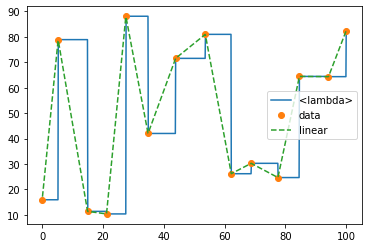

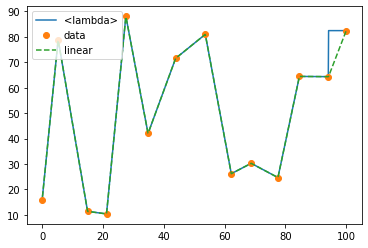

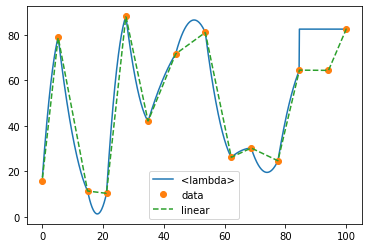

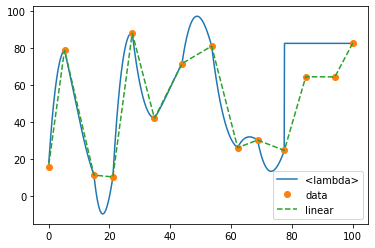

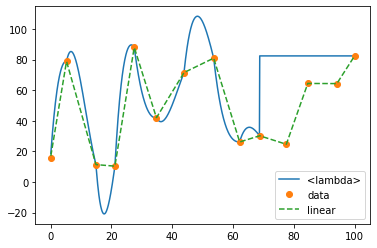

In [9]:
def lagrange_n(xs, ys, val, powerN):
    npoints = powerN
    lambda_ = [0.0] * len(ys)
    y = 0.0
    j = findNearest(xs, ys, val)
    if j >= len(xs)-npoints:
        return ys[-1]
    
    is_ = j
    while is_ <= j + npoints-1:
        lambda_[is_] = 1.0
        il = j
        while il <= j + npoints-1:
            if il != is_:
                lambda_[is_] = lambda_[is_]*(val-xs[il])/(xs[is_]-xs[il])
            il += 1
        y = y + ys[is_]*lambda_[is_];
        is_ = is_+1
    return y

for power in range(1, 6):
    plot_func(lambda xs, ys, val : lagrange_n(xs, ys, val, power))

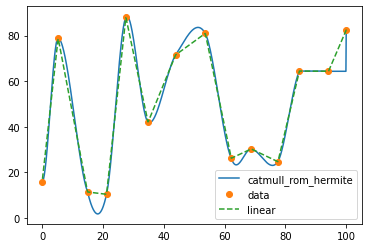

In [10]:
def spline_4p(t, p_1, p0, p1, p2 ):
    """ Catmull-Rom"""
        # wikipedia Catmull-Rom -> Cubic_Hermite_spline
        # 0 -> p0,  1 -> p1,  1/2 -> (- p_1 + 9 p0 + 9 p1 - p2) / 16
    # assert 0 <= t <= 1
    return (
          t*((2-t)*t - 1)   * p_1
        + (t*t*(3*t - 5) + 2) * p0
        + t*((4 - 3*t)*t + 1) * p1
        + (t-1)*t*t         * p2 ) / 2

def catmull_rom_hermite(xs, ys, val):
    i = findNearest(xs, ys, val)
    if i >= len(xs)-3:
        return ys[i]
    t = (val - xs[i]) / (xs[i+1] - xs[i])
    return spline_4p(t, ys[i-1], ys[i], ys[i+1], ys[i+2])
plot_func(catmull_rom_hermite)

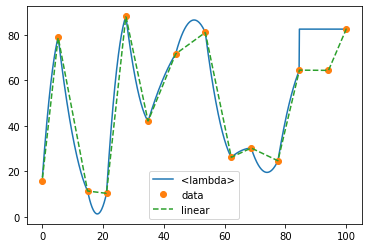

In [11]:
#cubic lagrange
plot_func(lambda xs, ys, val : lagrange_n(xs, ys, val, 3))

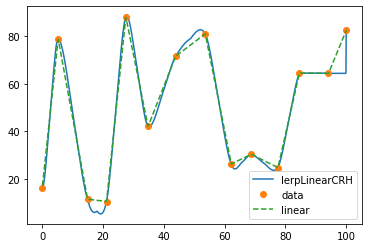

In [12]:
def lerpLinearCRH(xs, ys, val):
    i = findNearest(xs, ys, val)
    if i >= len(xs)-3:
        return ys[i]
    t = (val - xs[i]) / (xs[i+1] - xs[i])
    
    Y_linear =  ys[i] + t * (ys[i+1] - ys[i])
    Y_crh = spline_4p(t, ys[i-1], ys[i], ys[i+1], ys[i+2])
    blendedCoeff = min(max(1-t, t), 1.0)
    return Y_linear * (1-blendedCoeff) + Y_crh * blendedCoeff
    
plot_func(lerpLinearCRH)